# LINEAR REGRESSION ASSIGNMENT

## PROBLEM STATEMENT

- BoomBikes, a US bike-sharing provider, is facing difficulties due to the Covid-19 pandemic, leading to significant dips in revenue. 
- To overcome this, the company is developing a strategic business plan to increase revenue once the lockdown ends and the economy improves. 
- As part of this plan, BoomBikes aims to understand the demand for shared bikes among people after the quarantine. This will enable the company to better serve customers and stand out from competitors, ultimately leading to higher profits.

# BUSINESS GOAL

- The demand for shared bikes will be modeled using available independent variables to help the management understand how demand is influenced by different factors. 
- This information will be used to adjust the business strategy and meet customer expectations. 
- The model will also provide valuable insight into the demand dynamics of a new market, helping the management make informed decisions.

## STEP 1 : Reading and Understand the Data

In [1]:
#We begin by importing the necessary libraries. We also import the warnings that are essential.

# Visualisation libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Supress warnings
import warnings
warnings.filterwarnings("ignore")

# Machine Learning libraries

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler

In [2]:
#Now we go ahead and read the .csv files that contain the essential datasets for cfurther analysis.

bike = pd.read_csv("day (2).csv")

In [3]:
# Checking the head of the dataset

bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


#### Now, we inspect the various aspects of the bike dataframe.

In [4]:
# Analyse the shape of the dataset.

bike.shape

(730, 16)

The dataset has the following shape:

- 730 rows
- 16 columns

In [5]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


As it can be observed from the above analysis that the dataset has columns of the following datatypes:

- float64 : 4
- int64 : 11
- object : 1

In [6]:
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### Data Cleaning

In [7]:
# Checking for Null values

bike.isnull().sum()*100/bike.shape[0]

# Thus, there are no null values.

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

In [8]:
# Checking for duplicate values.

sum(bike.duplicated(subset = None)) == 0

# Thus, There are no duplicate values in the dataset.

True

### Dropping redundant columns

- The casual and registered columns contain the count of casual users and the count of registered users respectively. Whereas, the cnt column gives the count of total rental bikes including both casual and registered, thus, these two columns become redundant as we do not need to analyse riders by specific categories. Thus, we drop these two columns.
- The instant columns is only an index column so we can drop it.
- The dteday column also becomes redundant as we already have the yr and month columns, so can drop it.

In [9]:
bike.drop(['instant', 'dteday', 'casual', 'registered'], axis = 1, inplace = True)

In [10]:
bike.shape

(730, 12)

## STEP 2: Visualising the Data

In [11]:
# Encoding the Categorical Columns.

# Converting the values in the season column.

bike.season.replace((1,2,3,4), ('Spring', 'Summer', 'Fall', 'Winter'), inplace = True)
bike.season.value_counts(normalize = False)

Fall      188
Summer    184
Spring    180
Winter    178
Name: season, dtype: int64

In [12]:
# Converting the values in the weathersit column.

bike.weathersit.replace((1,2,3,4), ('Clear', 'Mist + Cloudy', 'Lightsnow + rain', 'Heavyrain + snow'), inplace = True)
bike.weathersit.value_counts(normalize = False)

Clear               463
Mist + Cloudy       246
Lightsnow + rain     21
Name: weathersit, dtype: int64

In [13]:
# Converting the values in the mnth column.

bike.mnth.replace((1,2,3,4,5,6,7,8,9,10,11,12), ('Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'), inplace = True)
bike.mnth.value_counts(normalize = False)

Jan    62
Mar    62
May    62
Jul    62
Aug    62
Oct    62
Dec    62
Apr    60
Jun    60
Sep    60
Nov    60
Feb    56
Name: mnth, dtype: int64

In [14]:
# Converting the values in the weekday column.

bike.weekday.replace((0,1,2,3,4,5,6), ('Sun', 'Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat'), inplace = True)
bike.weekday.value_counts(normalize = False)

Mon     105
Tue     105
Wed     104
Thur    104
Fri     104
Sat     104
Sun     104
Name: weekday, dtype: int64

In [15]:
# Converting the values in the workingday column. (if day is neither weekend nor holiday then 1 has been replaced by "yes", otherwise is 0 has been replaced by "no")

bike.workingday.replace((0,1), ('No', 'Yes'), inplace = True)
bike.workingday.value_counts(normalize = False)

Yes    504
No     226
Name: workingday, dtype: int64

In [16]:
# Converting the values in the workingday column.

bike.holiday.replace((0,1), ('No', 'Yes'), inplace = True)
bike.holiday.value_counts(normalize = False)

No     709
Yes     21
Name: holiday, dtype: int64

In [17]:
# Converting the values in the yr column.

bike.yr.replace((0,1), ('2018', '2019'), inplace = True)
bike.yr.value_counts(normalize = False)

2018    365
2019    365
Name: yr, dtype: int64

### UNIVARIATE ANALYSIS

#### CATEGORICAL VARIABLES

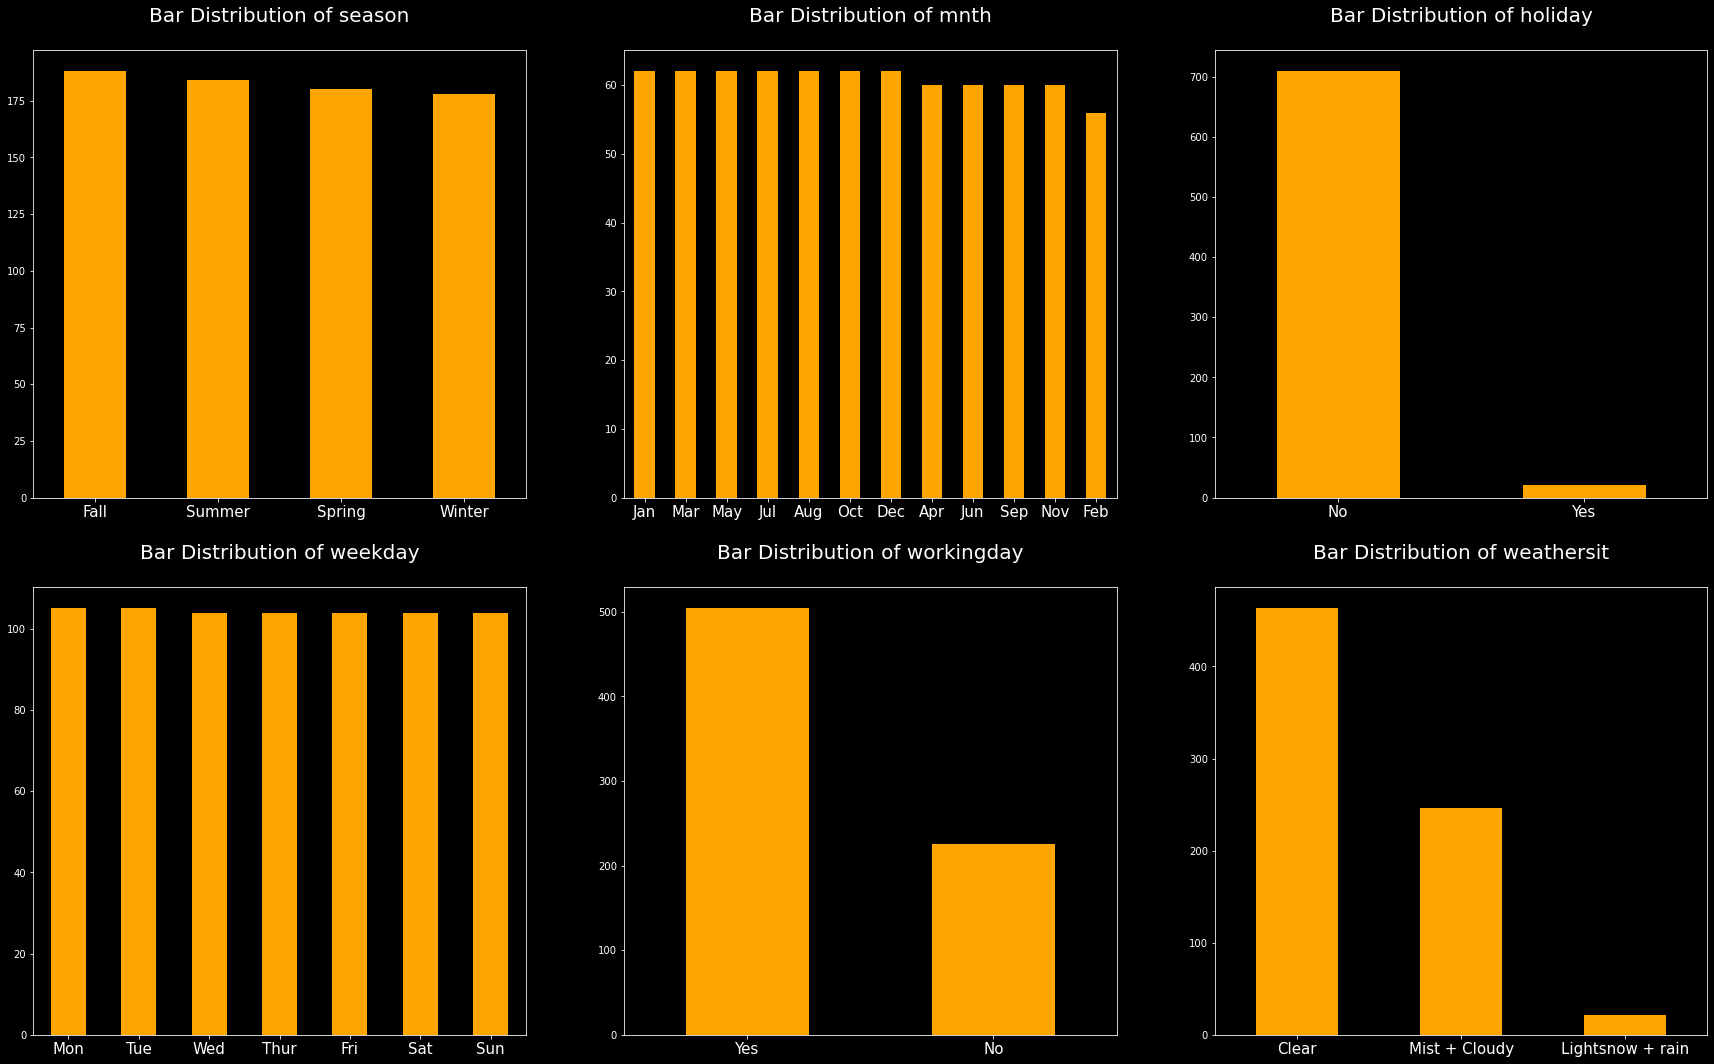

In [18]:
plt.style.use("dark_background")
var_list_1 = ["season", "mnth", "holiday", "weekday", "workingday", "weathersit"]

x = 0
plt.figure(figsize= [30,28])
for i in var_list_1:
    x += 1
    plt.subplot(3,3,x)
    plt.title("Bar Distribution of "+i + "\n", fontsize = 20)
    bike[i].value_counts().plot(kind = 'bar', color = 'orange')
    plt.xticks(rotation=0, fontsize = 15)

#### OBSERVATION 

- The first bar diagram shows the bar distribution of seasons. The number of days in Fall are 188, Summer are 184, Spring are 180 and Winter are 178.
- The second bar diagram shows the bar distribution of months. The number of days in Jan are 62, Mar are 62, May are 62, Jul are 62, Aug are 62, Oct are 62, Dec are 62, Apr are 60, Jun are 60, Sep are 60, Nov are 60 and Feb are 56.
- The third bar diagram shows the bar distribution of holidays. 21 days are holidays and 709 are not holidays.
- The fourth bar diagram shows the bar distribution of months. The number of days in Monday are 105, Tuesday are 105, Wednesday are 104, Thursday are 104, Friday are 104, Saturday are 104 and Sun are 104.
- The fifth bar diagram shows the bar distribution of workingdays. 504 days are workingdays and the rest are non-working days.
- The fourth bar diagram shows the bar distribution of weather. The number of days in Clear are 463, Mist + Cloudy are 246 and Lightsnow + rain are 21.

#### NUMERIC VARIABLES

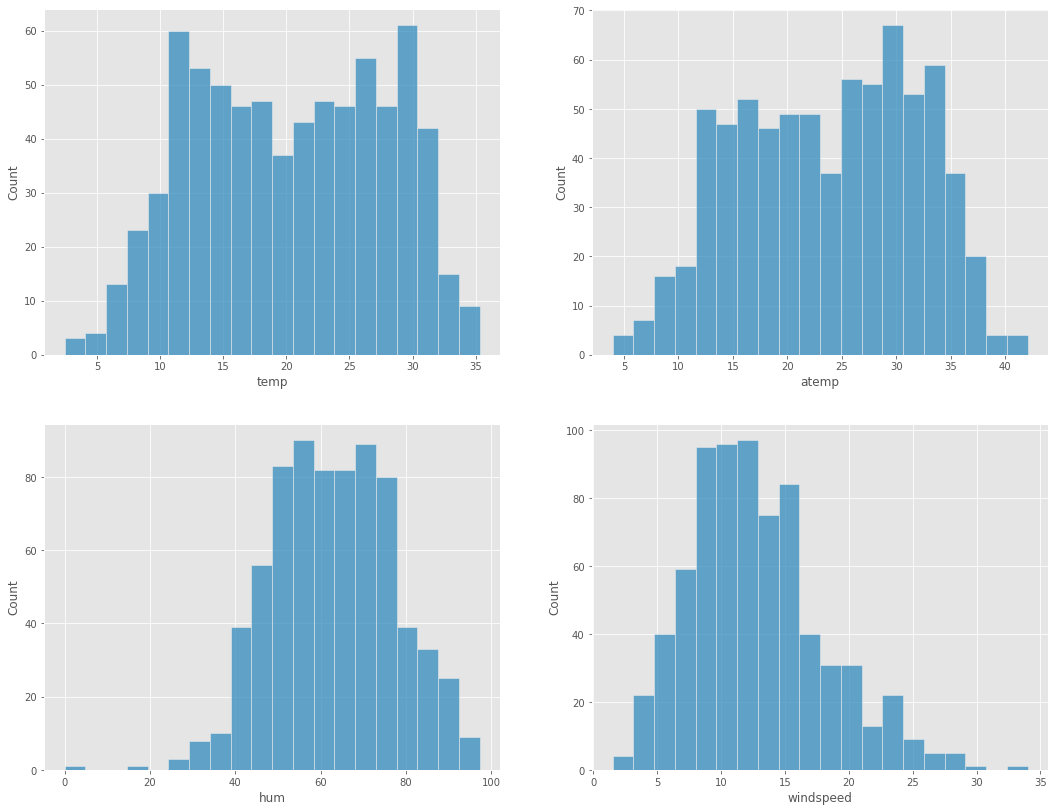

In [19]:
# Univariate Analysis of numeric variables
var_list_2 = ['temp', 'atemp', 'hum', 'windspeed']

plt.style.use("ggplot")
fig, axes = plt.subplots(2,2, figsize = (18,14))
sns.histplot(ax= axes[0,0], data= bike['temp'], bins= 20)
sns.histplot(ax= axes[0,1], data= bike['atemp'], bins= 20)
sns.histplot(ax= axes[1,0], data= bike['hum'], bins= 20)
sns.histplot(ax= axes[1,1], data= bike['windspeed'], bins= 20)
plt.show()

#### OBSERVATION 

- The distribution for tempeture reaches peaks at two points, one around 12 degrees and the other around 31 degrees.
- The distribution for feeling tempeture (atemp) reaches peaks at around 30 degrres.
- The distribution for humidity shows that the maximum humidity ranges between 50 to 80.
- The distribution for wind speed shows that the maximum wind speed ranges between 8 to 16.

## Bi - Variate and Multi - Variate Analysis

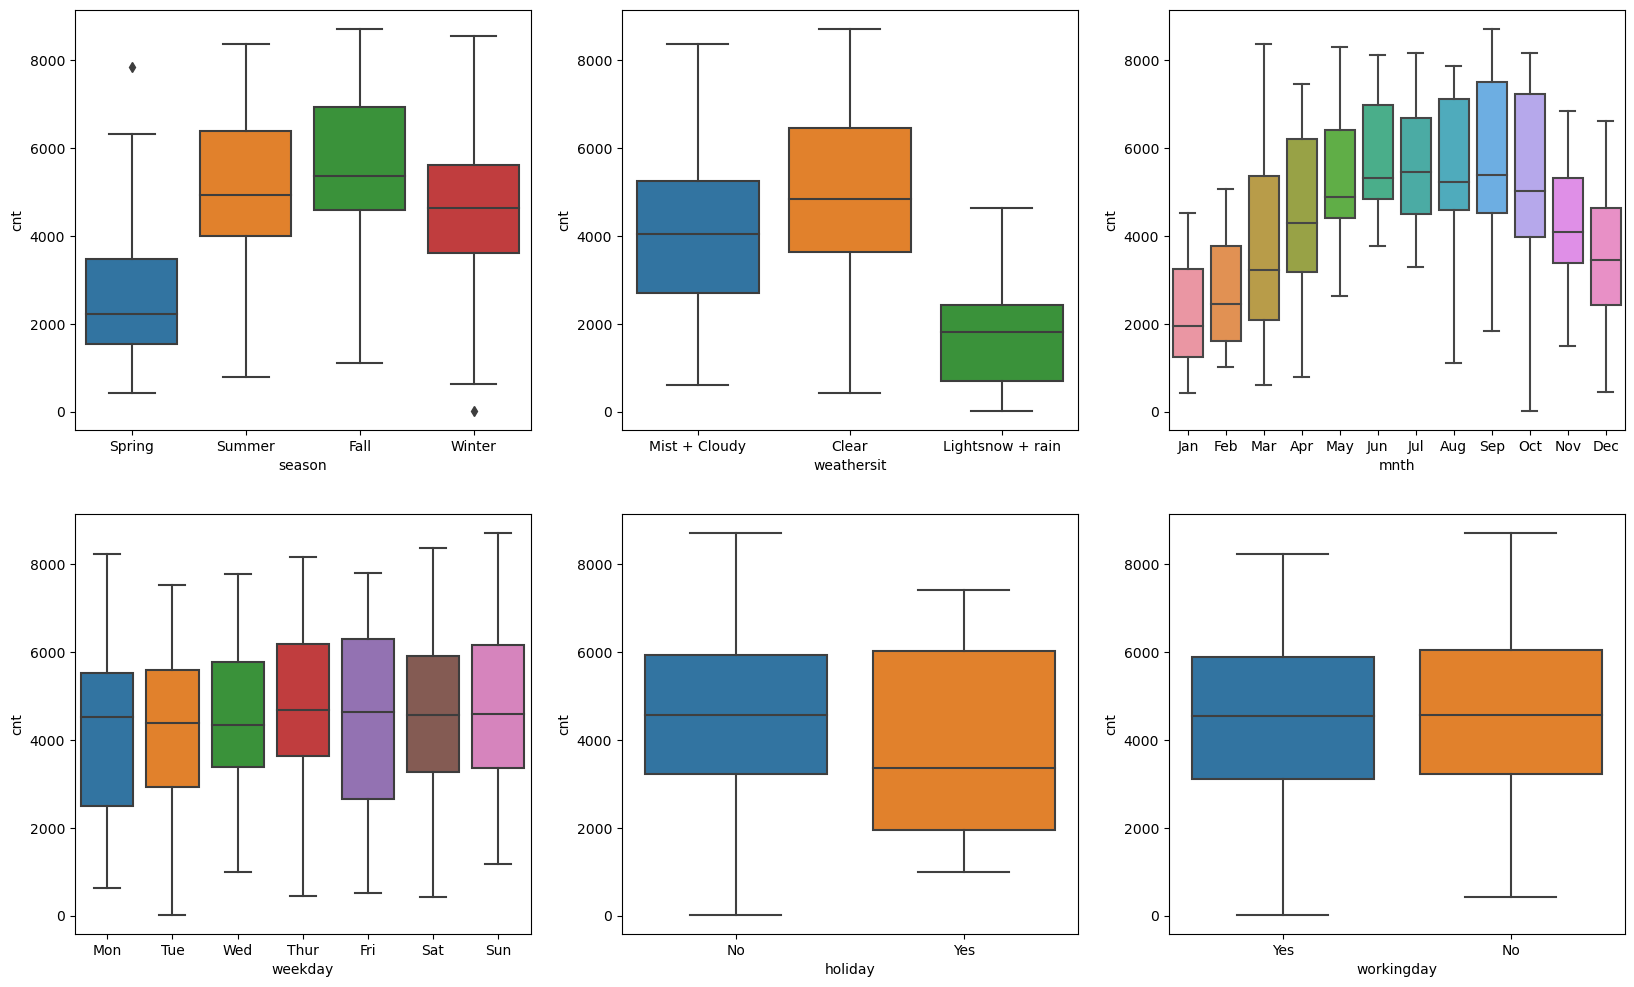

In [20]:
# Analysing the categorial varibales aginst the target variable 'cnt'.

plt.style.use("default")

plt.figure(figsize=(20, 12))

plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike)
plt.subplot(2,3,2)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike)
plt.subplot(2,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike)
plt.subplot(2,3,4)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike)
plt.subplot(2,3,5)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike)
plt.subplot(2,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike)
plt.show()

#### OBSERVATION 

- The seasons Summer and Fall have more median bookings compared to Spring and Winter. Thus, the season variable does show a relationship with the 'cnt' variable which is the target or the dependent variable.
- Similarly, Clear weather shows more bookings than the other two thus, indicating a trend with the target variable.
- Also, significantly more bookings can be observed in the monthe of March to October, thus, showing a relationship with cnt.

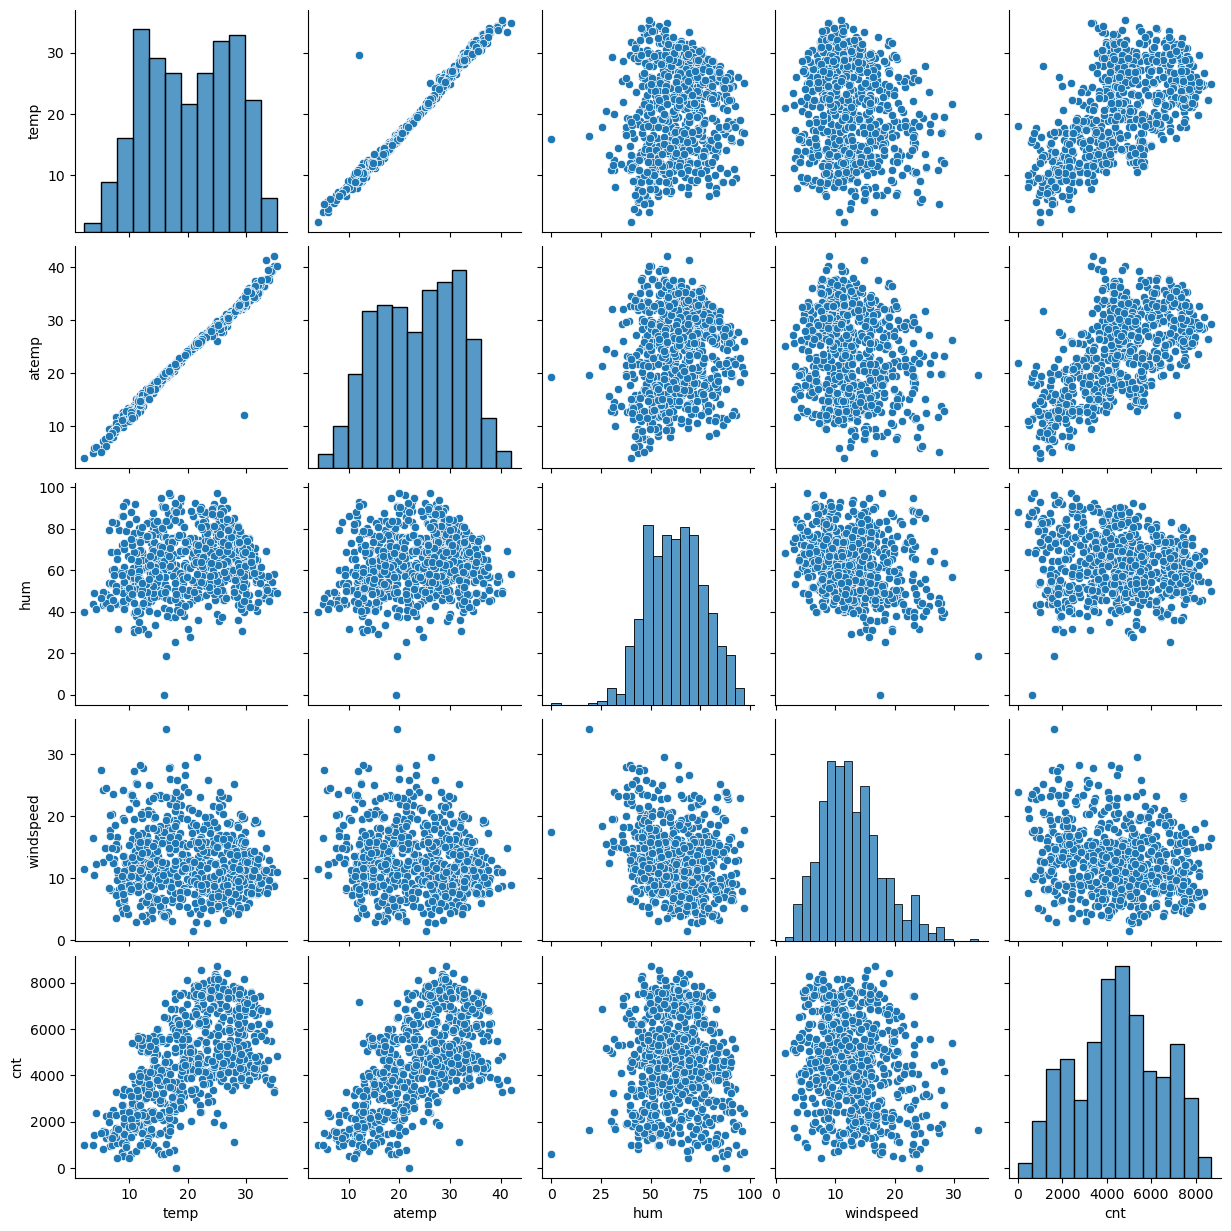

In [21]:
# Visualing the numeric variables.

var_list = bike[['temp', 'atemp', 'hum', 'windspeed', 'cnt']]
sns.pairplot(var_list)
plt.show()

#### OBSERVATION 

- Temp and Atemp show a postive relationship with 'cnt'.
- There is also high positive linear relationship between temp and atemp, which indicates the pressence of multicollinearity. Thus, we drop the `atemp` column to reduce multicollinearity.

In [22]:
# Dropping of atemp column.

bike.drop(['atemp'], axis = 1, inplace = True)

In [23]:
bike.shape

(730, 11)

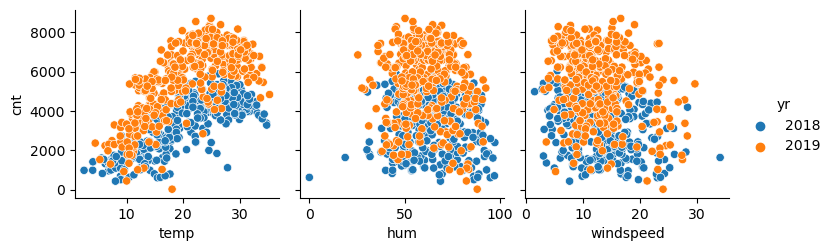

In [24]:
# Analysing the 'yr' variable with the other numeric variables.


sns.pairplot(x_vars= ['temp', 'hum', 'windspeed'], y_vars = ['cnt'], data = bike, hue = 'yr')
plt.show()

#### OBSERVATION

- All the variables show higher values in 2019 compared to 2018, thus, the year variable shows significant relationship with the target variable.

In [25]:
bike.corr()

,temp,hum,windspeed,cnt
temp,1.000000,0.128565,-0.158186,0.627044
hum,0.128565,1.000000,-0.248506,-0.098543
windspeed,-0.158186,-0.248506,1.000000,-0.235132
cnt,0.627044,-0.098543,-0.235132,1.000000


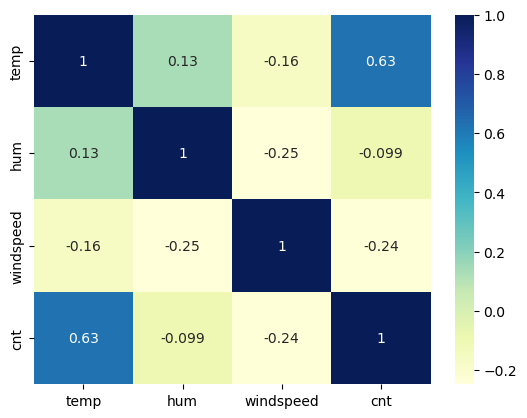

In [26]:
sns.heatmap(bike.corr(), annot = True, cmap="YlGnBu")
plt.show()

#### OBSERVATION

- There is high positive correlation between temp and cnt variables.
- There is negative correlation between winspeed and cnt variables.

## STEP 3 : Data Preparation

In [27]:
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,Spring,2018,Jan,No,Mon,Yes,Mist + Cloudy,14.110847,80.5833,10.749882,985
1,Spring,2018,Jan,No,Tue,Yes,Mist + Cloudy,14.902598,69.6087,16.652113,801
2,Spring,2018,Jan,No,Wed,Yes,Clear,8.050924,43.7273,16.636703,1349
3,Spring,2018,Jan,No,Thur,Yes,Clear,8.200000,59.0435,10.739832,1562
4,Spring,2018,Jan,No,Fri,Yes,Clear,9.305237,43.6957,12.522300,1600


- It can be seen that the dataset has columns with values as 'Yes' or 'No'.

- But in order to fit a regression line, we would need numerical values and not string. Hence, we need to convert them to 1s and 0s, where 1 is a 'Yes' and 0 is a 'No'.

In [28]:
# List of variables to map

varlist =  ['holiday', 'workingday']

# Defining the map function

def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list

bike[varlist] = bike[varlist].apply(binary_map)

### DUMMY VARIABLES

- The variable `season`, `weathersit`, `mnth`, `weekday` have multiple levels. We need to convert these levels into integer as well. 

- For this, we will use something called `dummy variables`.

In [29]:
# To get the dummy variables for the feature 'season' and store it in a new variable - 'season_dummy'

season_dummy = pd.get_dummies(bike['season'])

In [30]:
season_dummy.head()

,Fall,Spring,Summer,Winter
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0


We you don't need four columns. Thus, we drop the `fall` column, as the season can be identified with just the last three columns.

In [31]:
# Let's drop the first column from season_dummy using 'drop_first = True'

season_dummy = pd.get_dummies(bike['season'], drop_first = True)

In [32]:
season_dummy.head()

,Spring,Summer,Winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [33]:
# Similarly we get the dummy variables for the other columns.

# Weathersit

weathersit_dummy = pd.get_dummies(bike['weathersit'], drop_first = True)

weathersit_dummy.head()

,Lightsnow + rain,Mist + Cloudy
0,0,1
1,0,1
2,0,0
3,0,0
4,0,0


In [34]:
# mnth

mnth_dummy = pd.get_dummies(bike['mnth'], drop_first = True)

mnth_dummy.head()

,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


In [35]:
# weekday

weekday_dummy = pd.get_dummies(bike['weekday'], drop_first = True)

weekday_dummy.head()

,Mon,Sat,Sun,Thur,Tue,Wed
0,1,0,0,0,0,0
1,0,0,0,0,1,0
2,0,0,0,0,0,1
3,0,0,0,1,0,0
4,0,0,0,0,0,0


In [36]:
# Now, we merge the dataframes with the dummy variables and the original dataframe.

bike = pd.concat([bike, season_dummy, weathersit_dummy, mnth_dummy, weekday_dummy], axis = 1)

In [37]:
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,...,May,Nov,Oct,Sep,Mon,Sat,Sun,Thur,Tue,Wed
0,Spring,2018,Jan,0,Mon,1,Mist + Cloudy,14.110847,80.5833,10.749882,...,0,0,0,0,1,0,0,0,0,0
1,Spring,2018,Jan,0,Tue,1,Mist + Cloudy,14.902598,69.6087,16.652113,...,0,0,0,0,0,0,0,0,1,0
2,Spring,2018,Jan,0,Wed,1,Clear,8.050924,43.7273,16.636703,...,0,0,0,0,0,0,0,0,0,1
3,Spring,2018,Jan,0,Thur,1,Clear,8.200000,59.0435,10.739832,...,0,0,0,0,0,0,0,1,0,0
4,Spring,2018,Jan,0,Fri,1,Clear,9.305237,43.6957,12.522300,...,0,0,0,0,0,0,0,0,0,0


In [38]:
# We drop the original columns for which now we have created the dummies.

bike.drop(['season', 'mnth', 'weekday', 'weathersit'], axis = 1, inplace = True)

In [39]:
# Converting the values in the yr column.

bike.yr.replace(('2018', '2019'), (0,1), inplace = True)

In [40]:
bike.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,Spring,Summer,Winter,...,May,Nov,Oct,Sep,Mon,Sat,Sun,Thur,Tue,Wed
0,0,0,1,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,1,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,0,0,0


## Step 4: Splitting the Data into Training and Testing Sets

In [41]:
# We split the dataset into Train and Test datasets.

np.random.seed(0)
bike_train, bike_test = train_test_split(bike, train_size = 0.7, test_size = 0.3, random_state = 333)

### Rescaling the Features 


There are two common ways of rescaling:

1. Min-Max scaling 
2. Standardisation (mean-0, sigma-1) 

Here, we will use MinMax scaling.

In [42]:
scaler = MinMaxScaler()

In [43]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables

var_list = ['temp', 'hum', 'windspeed', 'cnt']

bike_train[var_list] = scaler.fit_transform(bike_train[var_list])

In [44]:
bike_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,Spring,Summer,Winter,...,May,Nov,Oct,Sep,Mon,Sat,Sun,Thur,Tue,Wed
483,1,0,1,0.497426,0.609956,0.194850,0.722734,0,1,0,...,0,0,0,0,1,0,0,0,0,0
650,1,0,0,0.416433,0.513852,0.255118,0.815347,0,0,1,...,0,0,1,0,0,0,1,0,0,0
212,0,0,1,0.887856,0.572294,0.276919,0.488265,0,0,0,...,0,0,0,0,0,0,0,0,0,1
714,1,0,1,0.378013,0.871429,0.161523,0.433042,0,0,1,...,0,0,0,0,1,0,0,0,0,0
8,0,0,1,0.098690,0.451083,0.700017,0.092039,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [45]:
bike_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,Spring,Summer,Winter,...,May,Nov,Oct,Sep,Mon,Sat,Sun,Thur,Tue,Wed
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.501961,0.023529,0.692157,0.540901,0.647390,0.346318,0.515144,0.24902,0.247059,0.241176,...,0.092157,0.086275,0.084314,0.082353,0.143137,0.143137,0.143137,0.139216,0.152941,0.131373
std,0.500487,0.151726,0.462054,0.227898,0.149722,0.160266,0.224281,0.43287,0.431725,0.428217,...,0.289531,0.281045,0.278131,0.275172,0.350557,0.350557,0.350557,0.346511,0.360284,0.338139
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.343228,0.536147,0.230784,0.359468,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.646367,0.325635,0.516337,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.740406,0.757900,0.434287,0.685861,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Dividing into X and Y sets for the model building

In [46]:
y_train = bike_train.pop('cnt')
X_train = bike_train

## Step 5: Building a Linear Model

#### MODEL -1 

- Linear Regression Model by adding all the variables in the final dataset.

In [47]:
# Check all the columns of the dataframe.

bike.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'cnt',
       'Spring', 'Summer', 'Winter', 'Lightsnow + rain', 'Mist + Cloudy',
       'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar', 'May', 'Nov', 'Oct',
       'Sep', 'Mon', 'Sat', 'Sun', 'Thur', 'Tue', 'Wed'],
      dtype='object')

In [48]:
#Build a linear model by adding all the variables.

X_train_lm = sm.add_constant(X_train)

lr_1 = sm.OLS(y_train, X_train_lm).fit()

lr_1.params

const               0.308565
yr                  0.229891
holiday             0.021825
workingday          0.061245
temp                0.445354
hum                -0.165269
windspeed          -0.182572
Spring             -0.094059
Summer              0.010370
Winter              0.082440
Lightsnow + rain   -0.271810
Mist + Cloudy      -0.049895
Aug                -0.013896
Dec                -0.048519
Feb                -0.021130
Jan                -0.038346
Jul                -0.039036
Jun                 0.003015
Mar                 0.028133
May                 0.024523
Nov                -0.055975
Oct                 0.010115
Sep                 0.067962
Mon                -0.024492
Sat                 0.068585
Sun                 0.067654
Thur                0.003061
Tue                -0.033676
Wed                -0.014713
dtype: float64

In [49]:
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     93.15
Date:                Tue, 31 Jan 2023   Prob (F-statistic):          1.32e-174
Time:                        20:58:23   Log-Likelihood:                 513.46
No. Observations:                 510   AIC:                            -968.9
Df Residuals:                     481   BIC:                            -846.1
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.3086      0.108  

#### MODEL -2

- Creation of second model by running RFE.

In [50]:
# Running RFE with the output number of the variable equal to 15.
lm = LinearRegression()
lm.fit(X_train, y_train)

# running RFE
rfe = RFE(lm, n_features_to_select= 15)             
rfe = rfe.fit(X_train, y_train)

In [51]:
# To check which parameters have been selected.

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', False, 8),
 ('workingday', False, 2),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Spring', True, 1),
 ('Summer', False, 11),
 ('Winter', True, 1),
 ('Lightsnow + rain', True, 1),
 ('Mist + Cloudy', True, 1),
 ('Aug', False, 3),
 ('Dec', True, 1),
 ('Feb', False, 7),
 ('Jan', False, 6),
 ('Jul', True, 1),
 ('Jun', False, 14),
 ('Mar', True, 1),
 ('May', False, 4),
 ('Nov', True, 1),
 ('Oct', False, 12),
 ('Sep', True, 1),
 ('Mon', False, 9),
 ('Sat', True, 1),
 ('Sun', True, 1),
 ('Thur', False, 13),
 ('Tue', False, 5),
 ('Wed', False, 10)]

In [52]:
# Storing the above list of parameters in a column list.

col_list = X_train.columns[rfe.support_]
col_list

Index(['yr', 'temp', 'hum', 'windspeed', 'Spring', 'Winter',
       'Lightsnow + rain', 'Mist + Cloudy', 'Dec', 'Jul', 'Mar', 'Nov', 'Sep',
       'Sat', 'Sun'],
      dtype='object')

In [53]:
# To check which columns have been eliminated.

X_train.columns[~rfe.support_]

Index(['holiday', 'workingday', 'Summer', 'Aug', 'Feb', 'Jan', 'Jun', 'May',
       'Oct', 'Mon', 'Thur', 'Tue', 'Wed'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

In [54]:
# Creating X_train dataframe with RFE selected variables.

X_train_rfe = X_train[col_list]

In [55]:
# Adding a constant variable 

X_train_lm_1 = sm.add_constant(X_train_rfe)

In [56]:
# Running the linear model

lr_1 = sm.OLS(y_train,X_train_lm_1).fit()  

In [57]:
#Let's see the summary of our linear model

print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     170.1
Date:                Tue, 31 Jan 2023   Prob (F-statistic):          5.05e-184
Time:                        20:58:24   Log-Likelihood:                 503.06
No. Observations:                 510   AIC:                            -974.1
Df Residuals:                     494   BIC:                            -906.4
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.3561      0.033  

### Checking VIF

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating `VIF` is:

### $ VIF_i = \frac{1}{1 - {R_i}^2} $

In [58]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,hum,22.38
1,temp,15.98
3,windspeed,5.01
5,Winter,2.74
4,Spring,2.68
7,Mist + Cloudy,2.27
0,yr,2.05
11,Nov,1.83
9,Jul,1.42
8,Dec,1.41


#### MODEL -3

### Dropping the variable and updating the model

It can be noticed that some of the variable have high VIF values or high p-values. Such variables are insignificant and should be dropped.

The variable `Sat`, `Sun` and `Dec` have a significantly high p-value `0.050`, `0.046` and `0.015`. Hence, these could be dropped.

In [59]:
X_train_new = X_train_rfe.drop(['Sat', 'Sun', 'Dec'], axis = 1)

In [60]:
# Adding a constant variable 

X_train_lm_1 = sm.add_constant(X_train_new)


# Running the linear model

lr_1 = sm.OLS(y_train,X_train_lm_1).fit()   

#Let's see the summary of our linear model

print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     207.8
Date:                Tue, 31 Jan 2023   Prob (F-statistic):          6.73e-185
Time:                        20:58:24   Log-Likelihood:                 496.90
No. Observations:                 510   AIC:                            -967.8
Df Residuals:                     497   BIC:                            -912.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.3629      0.033  

In [61]:
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,hum,21.33
1,temp,15.12
3,windspeed,4.99
4,Spring,2.67
5,Winter,2.48
7,Mist + Cloudy,2.23
0,yr,2.04
10,Nov,1.64
8,Jul,1.40
6,Lightsnow + rain,1.20


#### MODEL -4

### Dropping the variable and updating the model

The variable `hum` has a significantly very high VIF `21.33`. Hence, this variable could be dropped.

In [62]:
X_train_new = X_train_new.drop(['hum'], axis = 1)

In [63]:
# Adding a constant variable 

X_train_lm_1 = sm.add_constant(X_train_new)


# Running the linear model

lr_1 = sm.OLS(y_train,X_train_lm_1).fit()   

#Let's see the summary of our linear model

print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     215.7
Date:                Tue, 31 Jan 2023   Prob (F-statistic):          2.02e-181
Time:                        20:58:24   Log-Likelihood:                 485.86
No. Observations:                 510   AIC:                            -947.7
Df Residuals:                     498   BIC:                            -896.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2598      0.025  

In [64]:
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,5.11
2,windspeed,4.95
0,yr,2.03
4,Winter,1.95
3,Spring,1.83
9,Nov,1.64
6,Mist + Cloudy,1.53
7,Jul,1.37
8,Mar,1.20
10,Sep,1.20


#### MODEL -5

### Dropping the variable and updating the model

The variables `Nov` and `Jul` have a significantly high p-values of `0.027` and `0.006` respectively. Hence, these could be dropped.

In [65]:
X_train_new = X_train_new.drop(['Nov', 'Jul'], axis = 1)

In [66]:
# Adding a constant variable 

X_train_lm_1 = sm.add_constant(X_train_new)


# Running the linear model

lr_1 = sm.OLS(y_train,X_train_lm_1).fit()   

#Let's see the summary of our linear model

print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     256.5
Date:                Tue, 31 Jan 2023   Prob (F-statistic):          4.76e-181
Time:                        20:58:24   Log-Likelihood:                 479.27
No. Observations:                 510   AIC:                            -938.5
Df Residuals:                     500   BIC:                            -896.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2618      0.025  

In [67]:
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,4.72
1,temp,4.09
0,yr,2.03
3,Spring,1.82
6,Mist + Cloudy,1.50
4,Winter,1.36
7,Mar,1.20
8,Sep,1.15
5,Lightsnow + rain,1.07


In [68]:
X_train_new.corr()

,yr,temp,windspeed,Spring,Winter,Lightsnow + rain,Mist + Cloudy,Mar,Sep
yr,1.000000,0.058432,0.020533,-0.033998,0.048207,-0.062839,-0.027637,-0.001144,0.013091
temp,0.058432,1.000000,-0.161614,-0.619600,-0.223969,-0.031071,-0.071646,-0.187481,0.193344
windspeed,0.020533,-0.161614,1.000000,0.183040,-0.149545,0.098492,-0.048791,0.088235,-0.104369
Spring,-0.033998,-0.619600,0.183040,1.000000,-0.324638,-0.035594,0.006413,0.287369,-0.172506
Winter,0.048207,-0.223969,-0.149545,-0.324638,1.000000,0.054228,0.039012,-0.164467,0.031188
Lightsnow + rain,-0.062839,-0.031071,0.098492,-0.035594,0.054228,1.000000,-0.116385,0.045367,0.042061
Mist + Cloudy,-0.027637,-0.071646,-0.048791,0.006413,0.039012,-0.116385,1.000000,0.036196,0.040178
Mar,-0.001144,-0.187481,0.088235,0.287369,-0.164467,0.045367,0.036196,1.000000,-0.087394
Sep,0.013091,0.193344,-0.104369,-0.172506,0.031188,0.042061,0.040178,-0.087394,1.000000


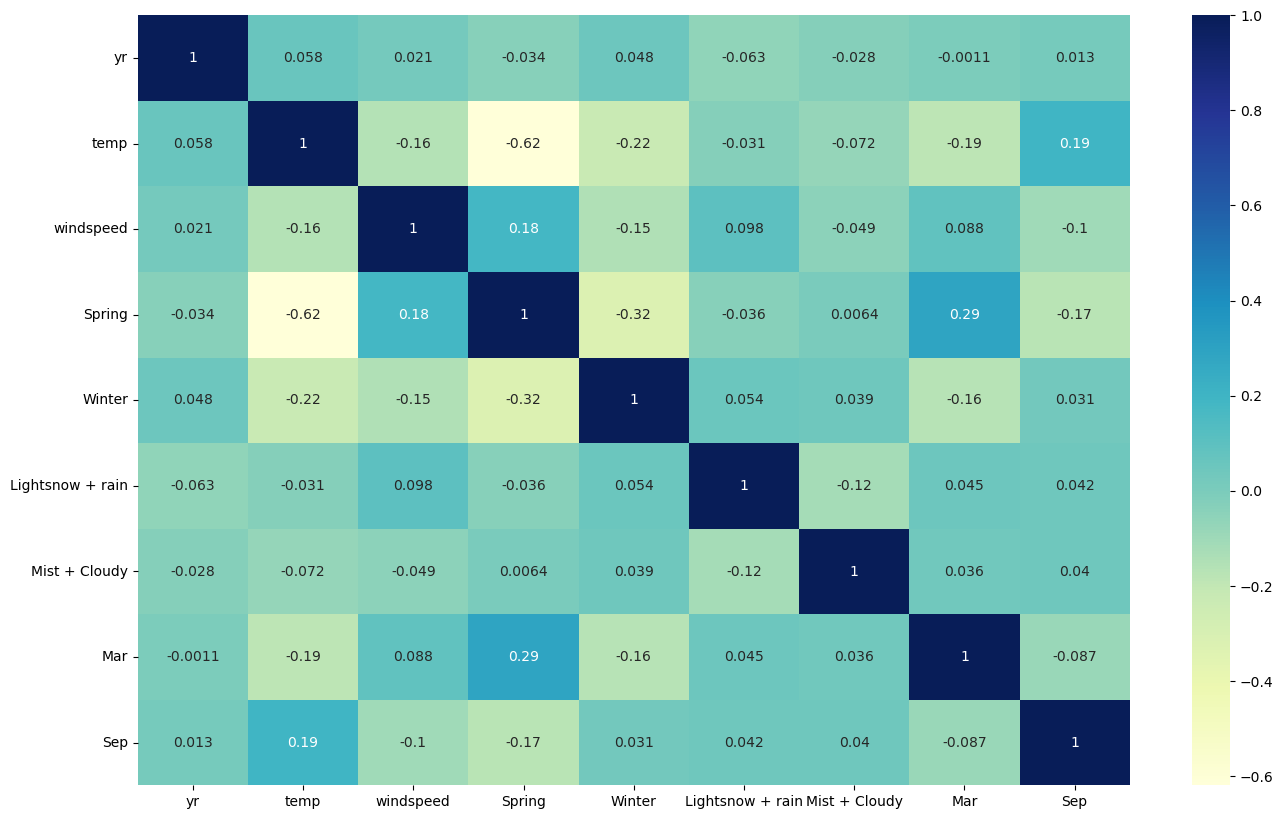

In [69]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (16, 10))
sns.heatmap(X_train_new.corr(), annot = True, cmap="YlGnBu")
plt.show()

#### FINAL MODEL : MODEL -6

### Dropping the variable and updating the model

It could be seen from the above heatmap that `Spring` and `Sep` has correlation values. Thus, we could drop this variable to reduce multicollinearity.

In [70]:
X_train_new = X_train_new.drop(['Spring', 'Sep'], axis = 1)

In [71]:
# Adding a constant variable 

X_train_lm_1 = sm.add_constant(X_train_new)


# Running the linear model

lr_1 = sm.OLS(y_train,X_train_lm_1).fit()   

#Let's see the summary of our linear model

print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.789
Method:                 Least Squares   F-statistic:                     272.7
Date:                Tue, 31 Jan 2023   Prob (F-statistic):          1.47e-166
Time:                        20:58:25   Log-Likelihood:                 439.39
No. Observations:                 510   AIC:                            -862.8
Df Residuals:                     502   BIC:                            -828.9
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1221      0.020  

In [72]:
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,3.46
1,temp,3.39
0,yr,1.99
5,Mist + Cloudy,1.47
3,Winter,1.28
6,Mar,1.13
4,Lightsnow + rain,1.06


In [73]:
lr_1.params

const               0.122057
yr                  0.229238
temp                0.610807
windspeed          -0.152874
Winter              0.111437
Lightsnow + rain   -0.293181
Mist + Cloudy      -0.065027
Mar                 0.042817
dtype: float64

### OBSERVATION

Now, the VIFs and p-values both are within an acceptable range. So we go ahead and make our predictions using this model only.

## Step 6: Residual Analysis of the Train Data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [74]:
y_train_pred = lr_1.predict(X_train_lm_1)

Text(0.5, 0, 'Errors')

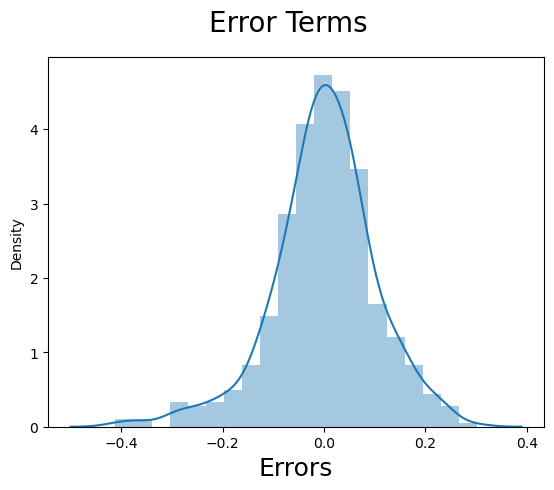

In [75]:
# Plot the histogram of the error terms

fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                   
plt.xlabel('Errors', fontsize = 18)                        

## Step 7: Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final.

#### Applying the scaling on the test sets

In [76]:
var_list = ['temp', 'hum', 'windspeed', 'cnt']

bike_test[var_list] = scaler.transform(bike_test[var_list])

bike_test.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,Spring,Summer,Winter,...,May,Nov,Oct,Sep,Mon,Sat,Sun,Thur,Tue,Wed
22,0,0,1,0.046591,0.453529,0.462217,0.110907,1,0,0,...,0,0,0,0,0,0,0,0,1,0
468,1,0,0,0.543115,0.522511,0.347424,0.855729,0,1,0,...,0,0,0,0,0,0,1,0,0,0
553,1,0,1,0.951196,0.596104,0.212829,0.534975,0,0,0,...,0,0,0,0,1,0,0,0,0,0
504,1,0,1,0.699909,0.551083,0.478229,0.817648,0,1,0,...,1,0,0,0,1,0,0,0,0,0
353,0,0,1,0.407087,0.618615,0.080770,0.428900,0,0,1,...,0,0,0,0,0,0,0,1,0,0


### Dividing into X_test and y_test

In [77]:
y_test = bike_test.pop('cnt')
X_test = bike_test

In [78]:
# Selecting variables that were a part of final model.

col_1 = X_train_new.columns

X_test = X_test[col_1]

In [79]:
# Adding constant variable to test dataframe

X_test = sm.add_constant(X_test)
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 22 to 313
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   const             219 non-null    float64
 1   yr                219 non-null    int64  
 2   temp              219 non-null    float64
 3   windspeed         219 non-null    float64
 4   Winter            219 non-null    uint8  
 5   Lightsnow + rain  219 non-null    uint8  
 6   Mist + Cloudy     219 non-null    uint8  
 7   Mar               219 non-null    uint8  
dtypes: float64(3), int64(1), uint8(4)
memory usage: 9.4 KB


In [80]:
# Making predictions using the final model

y_test_pred = lr_1.predict(X_test)

## Step 8: Model Validation

We perform the below steps to validate the assumptions of Linear Regression Model. The assumptions are as follows:

- Linear Relationship
- Homoscedasticity
- Absence of Multicollinearity
- Independence of residuals
- Normality of Errors

#### Linear Relationship

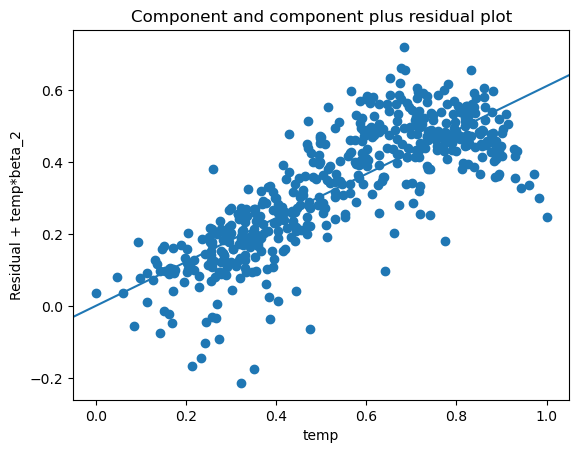

In [81]:
# To plot a component and component plus residual plot.

sm.graphics.plot_ccpr(lr_1, 'temp')
plt.show()

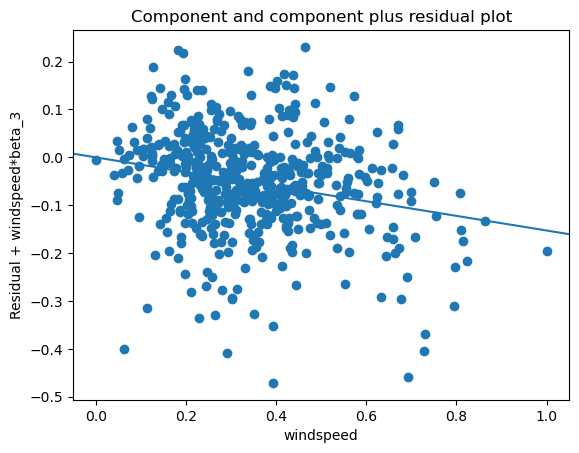

In [82]:
# To plot a component and component plus residual plot.

sm.graphics.plot_ccpr(lr_1, 'windspeed')
plt.show()

#### OBSERVATION 

- It could be observed from the above component and component plus residual plots that there exists a linear relationship between the model and the predictor variables.
- Thus, linearity has been well preserved in the model.

#### Homoscedasticity

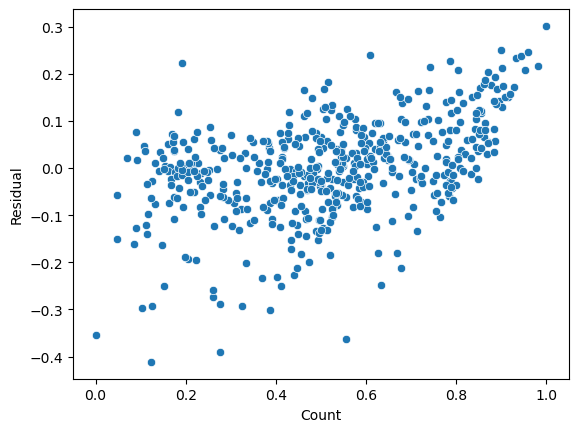

In [83]:
res = y_train - y_train_pred
sns.scatterplot(y_train, res)
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

#### OBSERVATION

There cannot be observed any visible pattern among the resideual values, thus, Homoscedascity is well preserved in the model.

#### Absence of Multicollinearity

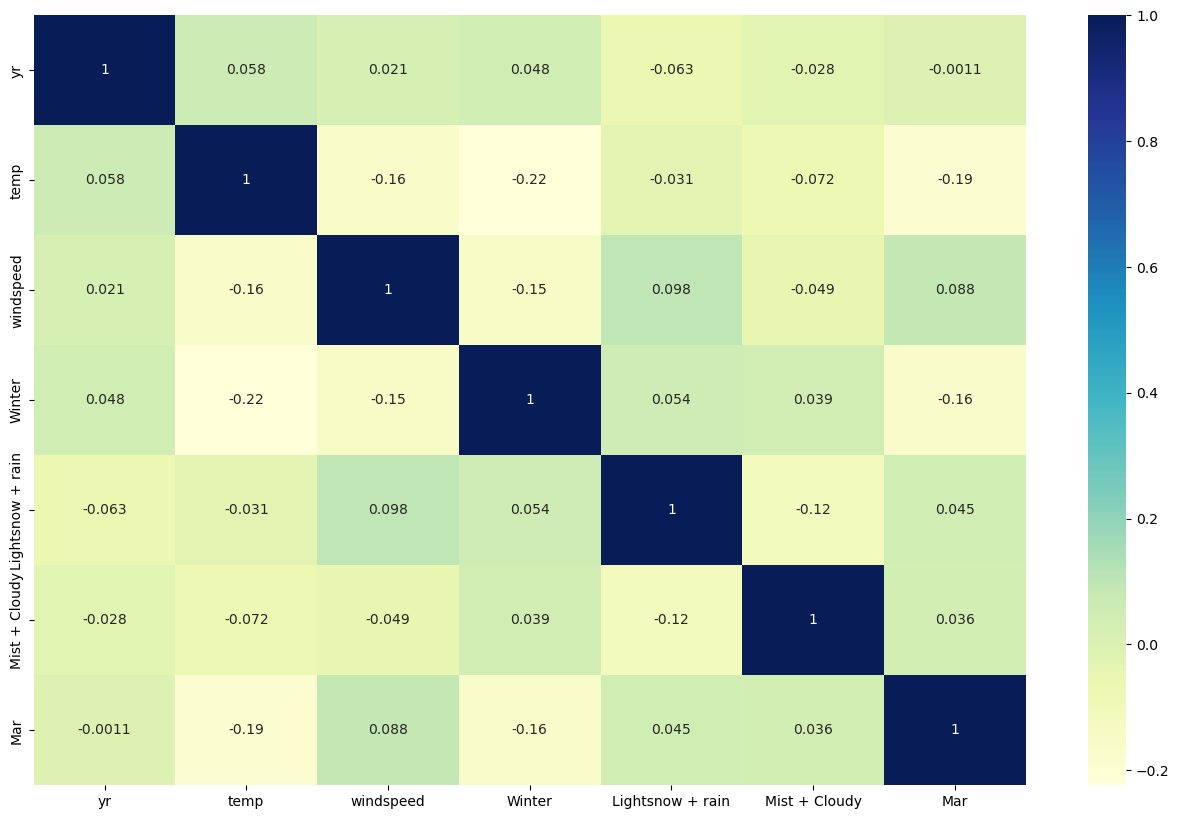

In [84]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (16, 10))
sns.heatmap(X_train_new.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [85]:
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,3.46
1,temp,3.39
0,yr,1.99
5,Mist + Cloudy,1.47
3,Winter,1.28
6,Mar,1.13
4,Lightsnow + rain,1.06


#### OBSERVATION 

- It can be observed from the heatmap that there is no significant correlation among the predictor variables.
- The VIF of all the parameters considered in the final model is much lower that 5, thus, there is no multicollinearity in the model.

#### Independence of residuals

In [86]:
# To verify if there is autocorrelation in the model we use the Durbin-Watson test.

print(round(sm.stats.stattools.durbin_watson((y_train - y_train_pred)), 4))

1.9822


#### OBSERVATION

The Durbin- Watson value of the model is very close to 2. Thus, there is almost no autocorrelation in the model.

#### Normality of Error

Text(0.5, 0, 'Errors')

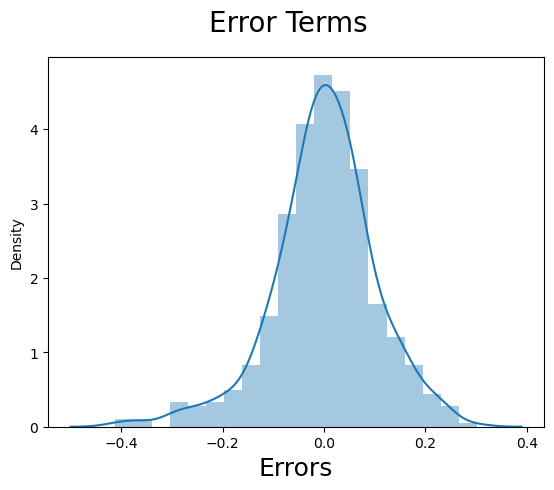

In [87]:
# Plot the histogram of the error terms

fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                   
plt.xlabel('Errors', fontsize = 18)   

#### OBSERVATION

The above histogram shows that the error terms follow a normal distribution.

## Step 9: Model Evaluation

Text(0, 0.5, 'y_test_pred')

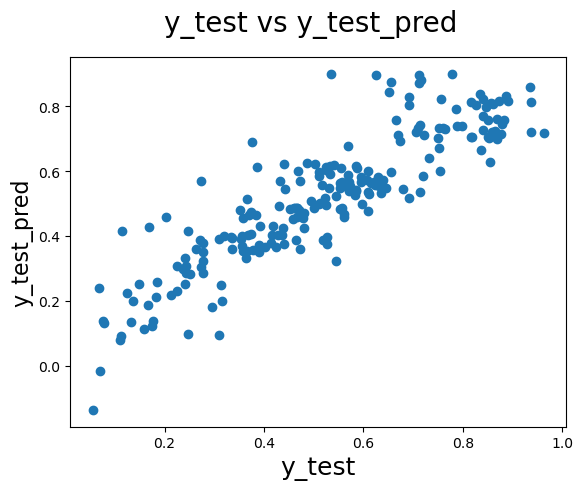

In [88]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize = 20)             
plt.xlabel('y_test', fontsize = 18)                          
plt.ylabel('y_test_pred', fontsize = 16) 

In [89]:
lr_1.params

const               0.122057
yr                  0.229238
temp                0.610807
windspeed          -0.152874
Winter              0.111437
Lightsnow + rain   -0.293181
Mist + Cloudy      -0.065027
Mar                 0.042817
dtype: float64

We can see that the equation of our best fitted line is:

$ cnt = 0.229238 \times  yr + 0.610807  \times  temp + 0.111437 \times Winter + 0.042817 \times Mar - 0.065027 \times Mist + Cloudy - 0.293181 \times Lightsnow + rain - 0.152874 \times windspeed $

#### INTERPRETATION OF COEFFICIENTS

- const : The constant value of 0.122057 indicates that even when all other predictors are absent, the bike rental could still increase by 0.122057 units.
- yr : The coefficient value of 0.229238 indicates that an unit increase in yr variable, increases the bike hire number by 0.229238 units.
- temp : The coefficient value of 0.610807 indicates that an unit increase in yr variable, increases the bike hire number by 0.610807 units.
- winter : The coefficient value of 0.111437 indicates that an unit increase in yr variable, increases the bike hire number by 0.111437 units.
- mar : The coefficient value of 0.042817 indicates that an unit increase in yr variable, increases the bike hire number by 0.042817 units.
- Mist+Cloudy : The coefficient value of -0.065027 indicates that an unit increase in yr variable, decreases the bike hire number by 0.065027 units.
- Lightsnow+rain : The coefficient value of −0.293181 indicates that an unit increase in yr variable, decreases the bike hire number by 0.293181 units.
- windspeed : The coefficient value of −0.152874 indicates that an unit increase in yr variable, decreases the bike hire number by 0.152874 units.

### R Square Value Calculation for bike_test dataframe

In [90]:
print(round(r2_score(y_true= y_train, y_pred = y_train_pred), 4))

0.7918


In [91]:
print(round(r2_score(y_true = y_test, y_pred = y_test_pred), 4))

0.7719


#### OBSERVATION 

- The r2_score for train dataset is 0.7918 and that for the test dataset is 0.7719. Thus, it could be concluded that the model is able to genralise various datasets well.

### INSIGHTS

As per the final model, the top 3 predictor variables that impact the bike bookings are as follows

- Temperature : The coefficient value of 0.610807 indicates that it has significant impact on bike rentals.
- Lightsnow+rain : The coefficient value of −0.293181 indicates that this weather condition makes people not rent bikes.
- yr : The coefficient value of 0.229238 indicates that yearly rentals have increased.

It is recommended from the above analysis that the above three variables are given importance while planning the bike rentals. 

It can be seen that high temperature and a good weather condition impact bike rentals positively. Thus, increasing the promotions and availability of bikes for rental during the summmer season would be beneficial to maximise the revenue.
    